1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Clinton or Trump?

3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?

In [171]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

from __future__ import division

In [172]:
poll_df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')

In [173]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 15 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null int64
Clinton                   1522 non-null int64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 178.4+ KB


In [174]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41,45,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
1,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6,89,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
2,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82,7,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
3,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38,43,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
4,IBD/TIPP,11/4/2016,11/7/2016,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43,41,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None


** 1) See chart below

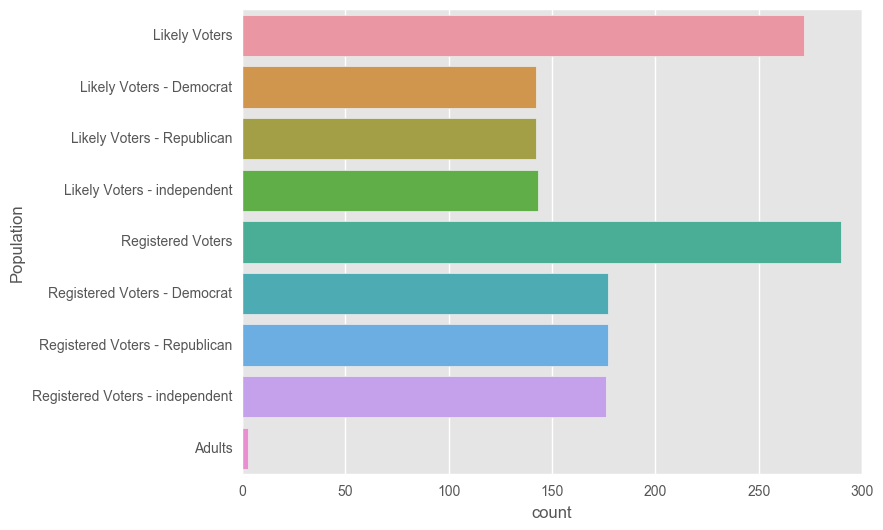

In [175]:
sns.countplot(y="Population", data=poll_df)

In [176]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41,45,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
1,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6,89,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
2,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82,7,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
3,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38,43,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None
4,IBD/TIPP,11/4/2016,11/7/2016,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43,41,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None


** 2) From the polls it seems like Clinton has the slight edge

In [177]:
avg = pd.DataFrame(poll_df.mean())
avg

,0
Number of Observations,1916.022705
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [178]:
avg.drop('Number of Observations',axis=0,inplace=True)

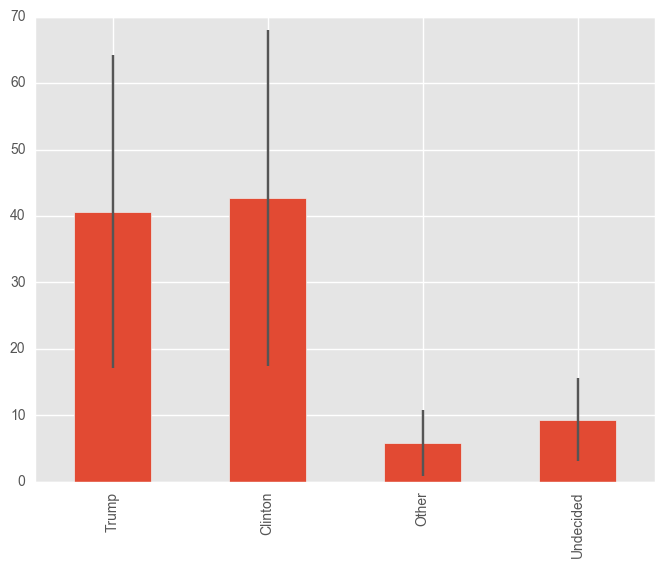

In [179]:
avg.plot(yerr=std,kind='bar',legend=False)

** 2) However, the standard deviation shows that this poll doesn't tell us anything.

** 3&4) The amount of undecided voters is larger than the margin between the two candidates, so, if the election is really hat close, these undecided voters will decide the election.  The "other" voters are also numerous enough to affect he outcome.

In [180]:

poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','STD']
poll_avg


,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [181]:
from datetime import datetime

In [182]:
#finding the difference between the two candidates each time a poll is run
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41,45,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,-0.04
1,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6,89,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,-0.83
2,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82,7,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,0.75
3,Insights West,11/4/2016,11/7/2016,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38,43,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,-0.05
4,IBD/TIPP,11/4/2016,11/7/2016,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43,41,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,0.02


In [183]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df = poll_df.ix[pd.to_datetime(poll_df['Start Date']).order().index]
poll_df.head(20)

C:\Users\none5\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Difference
128,5/19/2015,1046.000000,34.25,48.750,2.50,14.000,-0.14500
153,6/20/2015,420.750000,35.00,47.250,NaN,17.750,-0.12250
155,6/21/2015,1005.000000,34.00,51.000,3.00,12.000,-0.17000
160,6/26/2015,890.000000,36.75,57.000,6.00,0.000,-0.20250
198,7/9/2015,499.250000,35.25,49.500,NaN,16.000,-0.14250
180,7/20/2015,702.333333,38.75,47.250,NaN,13.750,-0.08500
182,7/22/2015,931.000000,40.00,54.625,3.75,5.600,-0.14625
184,7/23/2015,1011.666667,37.75,47.750,3.50,11.000,-0.10000
187,7/26/2015,950.000000,40.00,49.000,NaN,12.000,-0.09000
192,7/31/2015,3477.000000,49.00,50.000,NaN,NaN,-0.01000


** 5) We can see from the plot below that the difference in poll results between the candidates has decreased over time

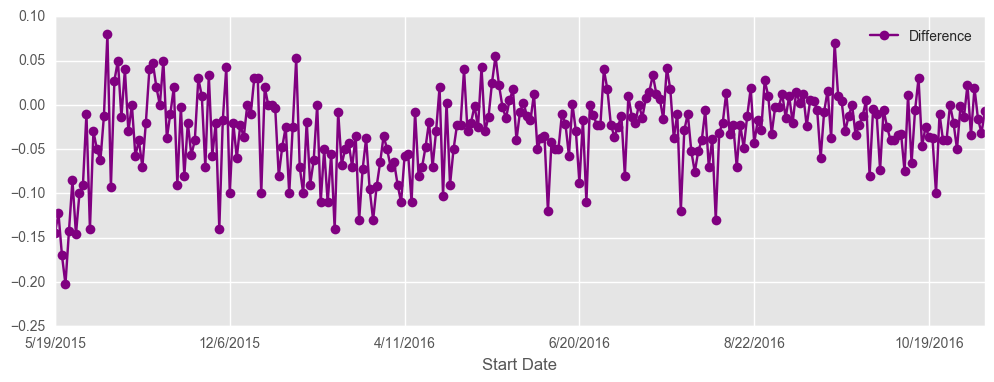

In [184]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [185]:
#find range of possible dates to help mark days of the debate on the graph below
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if (date[0:2] == '10' or date[0:1] == '9')and date[-4:] == '2016':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print min(xlimit)
print max(xlimit)

209
262


** 6) Because of the way the difference is calculated (Trump - Clinton), a dip in the graph below indicates rising approval for
#Clinton.  The day of each debate is marked with a grey line on the graph and we can see a dip after each debate which 
#means Trump did poorly in each debate.

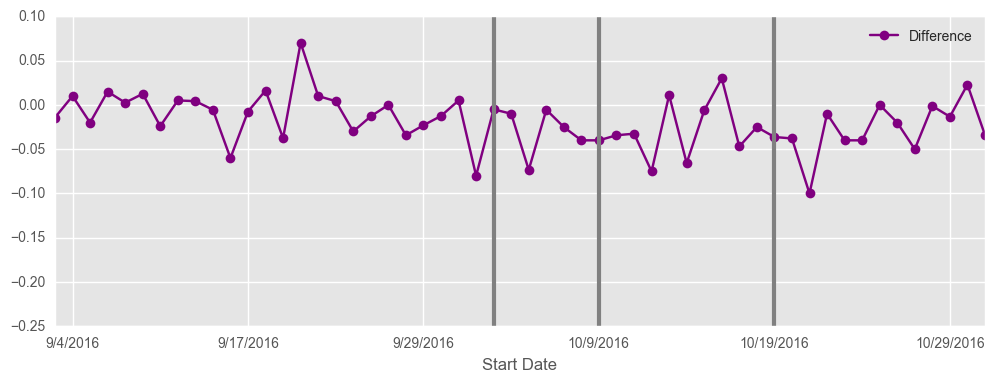

In [186]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(209,262))

#9/26/2016
plt.axvline(x=209+25,linewidth=3,color='grey')

#10/9/2016
plt.axvline(x=262-22,linewidth=3,color='grey')

#10/19/2016
plt.axvline(x=262-12,linewidth=3,color='grey')

1.) How much was donated and what was the average donation?

2.) How did the donations differ between candidates?

3.) How did the donations differ between Democrats and Republicans?

4.) What were the demographics of the donors?

5.) Is there a pattern to donation amounts?

In [190]:
donor_df = pd.read_csv('2016_Election_Donor_Data.csv')

In [191]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7344719 entries, C00458844 to C00623884
Data columns (total 18 columns):
cmte_id              object
cand_id              object
cand_nm              object
contbr_nm            object
contbr_city          object
contbr_st            object
contbr_zip           object
contbr_employer      object
contbr_occupation    float64
contb_receipt_amt    object
contb_receipt_dt     object
receipt_desc         object
memo_cd              object
memo_text            object
form_tp              int64
file_num             object
tran_id              object
election_tp          float64
dtypes: float64(2), int64(1), object(15)
memory usage: 1.0+ GB


In [192]:
donor_df = donor_df.drop(donor_df.index[[0,1]])
del donor_df['tran_id']
del donor_df['election_tp']

In [193]:
#The 'mixed columns' error above was because the data is misaligned.  Fixing it here.
donor_df2 = donor_df.copy()

columnsOriginal = donor_df.columns.values.tolist()
columnsFixed = donor_df2.columns.values.tolist()

for i in xrange(len(columnsFixed)):
    donor_df2[columnsFixed[i]] = donor_df[columnsOriginal[i-1]]
    
donor_df2


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
C00496034,SB28A.I7077,P20002721,"Santorum, Richard J.",MOTHER EMANUEL HOPE FUND,CHARLESTON,SC,29402,NaN,NaN,-1500.0,22-JUN-15,Refund,NaN,NaN,SB28A,1015452
C00496034,SA17A.934008,P20002721,"Santorum, Richard J.","WYLIE, WAYNE",HURST,TX,760542030,JPMORGAN CHASE,CREDIT OFFICER,100.0,05-APR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1084548
C00496034,SA17.934004,P20002721,"Santorum, Richard J.","GUNN, GEORGE",DALLAS,TX,752051646,HSI,GEOLOGIST,250.0,22-APR-15,NaN,NaN,PRIMARY 2012 DEBT RETIREMENT,SA17A,1015452
C00500587,SA43959,P20003281,"Perry, James R. (Rick)","RUSSELL, BILLY MR.",PELHAM,AL,35124,TRIPPLE R PIPELINE,CORROSION INSPECTOR,500.0,08-JUN-15,NaN,NaN,NaN,SA17A,1014957
C00500587,SA47417,P20003281,"Perry, James R. (Rick)","HASTON, FRED",TRUSSVILLE,AL,35173,CANE RIVER RESOURCES INC,PETROLEUM ENGINEER,100.0,17-AUG-15,NaN,NaN,NaN,SA17A,1028934
C00500587,SA47914,P20003281,"Perry, James R. (Rick)","MCGRATH, JOE",JONESBORO,AR,72401,NEA BAPTIST,PHYSCIAN,25.0,11-SEP-15,NaN,NaN,NaN,SA17A,1028934
C00500587,SA47862,P20003281,"Perry, James R. (Rick)","MCGRATH, JOE",JONESBORO,AR,72401,NEA BAPTIST,PHYSICIAN,25.0,01-SEP-15,NaN,NaN,NaN,SA17A,1028934
C00500587,SA45501,P20003281,"Perry, James R. (Rick)","GORR, RONALD",PRESCOTT VALLEY,AZ,86315,RETIRED,RETIRED,100.0,25-JUN-15,NaN,NaN,NaN,SA17A,1014957
C00500587,SA44009,P20003281,"Perry, James R. (Rick)","GORR, RONALD MR.",PRESCOTT VALLEY,AZ,86315,RETIRED,RETIRED,250.0,09-JUN-15,NaN,NaN,NaN,SA17A,1014957
C00500587,SB1023,P20003281,"Perry, James R. (Rick)","MCKERNAN, THOMAS V.",ARCADIA,CA,91006,NaN,NaN,-2700.0,28-SEP-15,Refund,NaN,NaN,SB28A,1028934


In [194]:
donor_df = donor_df2

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
C00496034,SB28A.I7077,P20002721,"Santorum, Richard J.",MOTHER EMANUEL HOPE FUND,CHARLESTON,SC,29402,NaN,NaN,-1500.0,22-JUN-15,Refund,NaN,NaN,SB28A,1015452
C00496034,SA17A.934008,P20002721,"Santorum, Richard J.","WYLIE, WAYNE",HURST,TX,760542030,JPMORGAN CHASE,CREDIT OFFICER,100.0,05-APR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1084548
C00496034,SA17.934004,P20002721,"Santorum, Richard J.","GUNN, GEORGE",DALLAS,TX,752051646,HSI,GEOLOGIST,250.0,22-APR-15,NaN,NaN,PRIMARY 2012 DEBT RETIREMENT,SA17A,1015452
C00500587,SA43959,P20003281,"Perry, James R. (Rick)","RUSSELL, BILLY MR.",PELHAM,AL,35124,TRIPPLE R PIPELINE,CORROSION INSPECTOR,500.0,08-JUN-15,NaN,NaN,NaN,SA17A,1014957
C00500587,SA47417,P20003281,"Perry, James R. (Rick)","HASTON, FRED",TRUSSVILLE,AL,35173,CANE RIVER RESOURCES INC,PETROLEUM ENGINEER,100.0,17-AUG-15,NaN,NaN,NaN,SA17A,1028934
C00500587,SA47914,P20003281,"Perry, James R. (Rick)","MCGRATH, JOE",JONESBORO,AR,72401,NEA BAPTIST,PHYSCIAN,25.0,11-SEP-15,NaN,NaN,NaN,SA17A,1028934
C00500587,SA47862,P20003281,"Perry, James R. (Rick)","MCGRATH, JOE",JONESBORO,AR,72401,NEA BAPTIST,PHYSICIAN,25.0,01-SEP-15,NaN,NaN,NaN,SA17A,1028934
C00500587,SA45501,P20003281,"Perry, James R. (Rick)","GORR, RONALD",PRESCOTT VALLEY,AZ,86315,RETIRED,RETIRED,100.0,25-JUN-15,NaN,NaN,NaN,SA17A,1014957
C00500587,SA44009,P20003281,"Perry, James R. (Rick)","GORR, RONALD MR.",PRESCOTT VALLEY,AZ,86315,RETIRED,RETIRED,250.0,09-JUN-15,NaN,NaN,NaN,SA17A,1014957
C00500587,SB1023,P20003281,"Perry, James R. (Rick)","MCKERNAN, THOMAS V.",ARCADIA,CA,91006,NaN,NaN,-2700.0,28-SEP-15,Refund,NaN,NaN,SB28A,1028934


In [195]:
donor_df['contb_receipt_amt'].value_counts()

 25.00      1033337
 50.00       870984
 100.00      757678
 10.00       632427
 5.00        433415
 15.00       326118
 27.00       313223
 250.00      270171
 35.00       149128
 20.00       141601
 200.00      130669
 40.00       124374
 19.00       120475
 500.00      112568
 8.00        102763
 80.00        97407
 75.00        93369
 28.00        85833
 2700.00      85074
 1000.00      78065
 3.00         76657
 38.00        69105
 1.00         57423
 30.00        54447
 150.00       49462
 37.00        39903
 400.00       32299
 16.00        27644
 7.00         24871
 300.00       22841
             ...   
-96.01            1
 360.73           1
-375.27           1
-43.08            1
 300.14           1
 198.49           1
-237.67           1
 202.33           1
 296.62           1
 208.38           1
 182.53           1
-294.51           1
-105.27           1
 393.49           1
 66.73            1
 245.54           1
 135.48           1
-217.52           1
 247.76           1


** 1) average donation was $124.21 with the total amount donated of $899,252,820.59

In [197]:

don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

don_sum = donor_df['contb_receipt_amt'].sum()

print 'The average donation was %.2f with a std of %.2f' %(don_mean,don_std)
print 'The total donations was %.2f' %(don_sum)

The average donation was 124.21 with a std of 7726.84
The total donations was 899252820.59


In [198]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort()
top_donor

C:\Users\none5\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


C00577130      -93308.00
C00580100      -84236.80
C00575795      -20000.00
C00573519      -18100.00
C00574624      -16600.00
C00573519      -16300.00
C00574624      -13500.00
C00573519      -13000.00
C00573519      -12242.00
C00577130      -12000.00
C00573519      -11700.00
C00573519      -11500.00
C00573519      -10800.00
C00574624      -10800.00
C00577130      -10500.00
C00577130      -10200.00
C00574624      -10100.00
C00573519      -10000.00
C00577130      -10000.00
C00574624       -9200.00
C00577130       -8460.00
C00577130       -8432.99
C00574624       -8300.00
C00573519       -8150.00
C00574624       -8100.00
C00573519       -8100.00
C00580480       -8100.00
C00577130       -7769.00
C00574624       -7700.00
C00580100       -7700.00
                ...     
C00581876       16200.00
C00573519       18000.00
C00581876       20000.00
C00575795       20000.00
C00581876       25000.00
C00581876       29100.00
C00580100       86936.80
C00575795      974215.27
C00575795     1467070.94


In [199]:
#can't have negative donations.  These are thrown out.
top_donor = top_donor[top_donor > 0]
top_donor.sort()
top_donor

C:\Users\none5\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


C00575449           0.01
C00575795           0.01
C00578658           0.01
C00575795           0.01
C00575795           0.01
C00575795           0.01
C00575795           0.01
C00575795           0.01
C00575795           0.02
C00575795           0.02
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.04
C00575795           0.05
C00575795           0.05
C00575795           0.05
C00575795           0.05
C00575795           0.05
C00575795           0.05
C00575795           0.05
C00575795           0.05
C00575795           0.05
                ...     
C00581876       16200.00
C00573519       18000.00
C00581876       20000.00
C00575795       20000.00
C00581876       25000.00
C00581876       29100.00
C00580100       86936.80
C00575795      974215.27
C00575795     1467070.94


** 5) most common donations are round amounts like $10, $25, $50 and $100

In [200]:

top_donor.value_counts().head(10)

25.0     1033337
50.0      870984
100.0     757678
10.0      632427
5.0       433415
15.0      326118
27.0      313223
250.0     270171
35.0      149128
20.0      141601
Name: contb_receipt_amt, dtype: int64

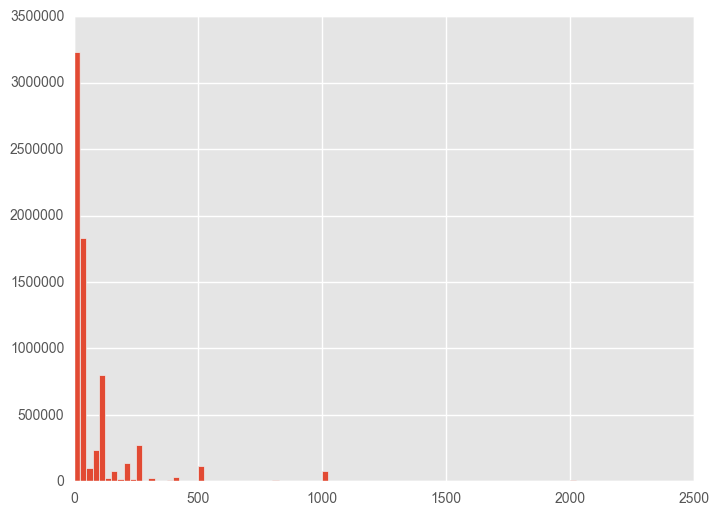

In [201]:
common_donations = top_donor[top_donor < 2500]
common_donations.hist(bins=100)

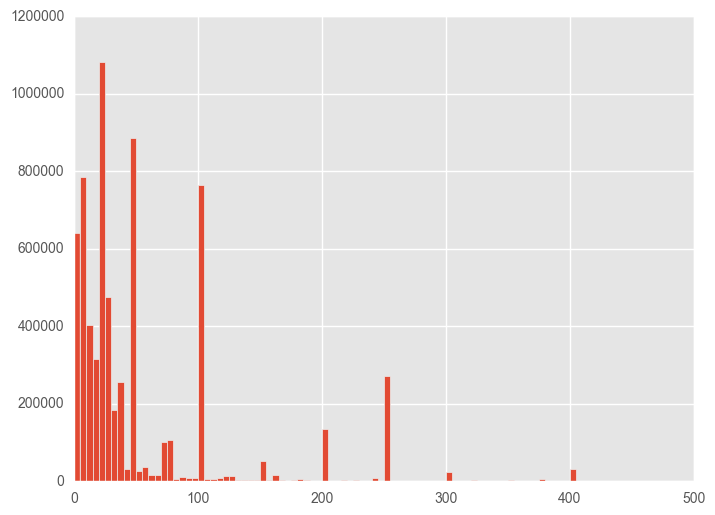

In [202]:
common_donations = top_donor[top_donor < 500]
common_donations.hist(bins=100)

In [203]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary',
       'McMullin, Evan'], dtype=object)

In [204]:
party_map = {'Rubio, Marco': 'Republican',
           'Santorum, Richard J.': 'Republican',
           'Perry, James R. (Rick)': 'Republican',
           'Carson, Benjamin S.': 'Republican',
           'Cruz, Rafael Edward \'Ted\'': 'Republican',
           'Paul, Rand': 'Republican',
           'Clinton, Hillary Rodham': 'Democrat',
           'Sanders, Bernard': 'Democrat',
           'Fiorina, Carly': 'Republican',
           'Huckabee, Mike': 'Republican',
           'Bush, Jeb': 'Republican',
           'Trump, Donald J.': 'Republican',
           'Jindal, Bobby': 'Republican',
           'Christie, Christopher J.': 'Republican',
           'Walker, Scott': 'Republican',
           'Kasich, John R.': 'Republican',
           'Lessig, Lawrence': 'Democrat',
           'Gilmore, James S III': 'Republican',
           'Pataki, George E.': 'Republican',
           'O\'Malley, Martin Joseph': 'Democrat',
           'Johnson, Gary': 'Other',
           'Stein, Jill': 'Other',
           'McMullin, Evan': 'Other',
           'Webb, James Henry Jr.': 'Other',
           'Gilmore, James S III': 'Republican',
           'Graham, Lindsey O.': 'Republican',
           'Paul, Rand': 'Republican'}

In [205]:
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [206]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
C00496034,SB28A.I7077,P20002721,"Santorum, Richard J.",MOTHER EMANUEL HOPE FUND,CHARLESTON,SC,29402,NaN,NaN,-1500.0,22-JUN-15,Refund,NaN,NaN,SB28A,1015452,Republican
C00496034,SA17A.934008,P20002721,"Santorum, Richard J.","WYLIE, WAYNE",HURST,TX,760542030,JPMORGAN CHASE,CREDIT OFFICER,100.0,05-APR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1084548,Republican
C00496034,SA17.934004,P20002721,"Santorum, Richard J.","GUNN, GEORGE",DALLAS,TX,752051646,HSI,GEOLOGIST,250.0,22-APR-15,NaN,NaN,PRIMARY 2012 DEBT RETIREMENT,SA17A,1015452,Republican
C00500587,SA43959,P20003281,"Perry, James R. (Rick)","RUSSELL, BILLY MR.",PELHAM,AL,35124,TRIPPLE R PIPELINE,CORROSION INSPECTOR,500.0,08-JUN-15,NaN,NaN,NaN,SA17A,1014957,Republican
C00500587,SA47417,P20003281,"Perry, James R. (Rick)","HASTON, FRED",TRUSSVILLE,AL,35173,CANE RIVER RESOURCES INC,PETROLEUM ENGINEER,100.0,17-AUG-15,NaN,NaN,NaN,SA17A,1028934,Republican


In [207]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
C00496034,SA17A.934008,P20002721,"Santorum, Richard J.","WYLIE, WAYNE",HURST,TX,760542030,JPMORGAN CHASE,CREDIT OFFICER,100.0,05-APR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1084548,Republican
C00496034,SA17.934004,P20002721,"Santorum, Richard J.","GUNN, GEORGE",DALLAS,TX,752051646,HSI,GEOLOGIST,250.0,22-APR-15,NaN,NaN,PRIMARY 2012 DEBT RETIREMENT,SA17A,1015452,Republican
C00500587,SA43959,P20003281,"Perry, James R. (Rick)","RUSSELL, BILLY MR.",PELHAM,AL,35124,TRIPPLE R PIPELINE,CORROSION INSPECTOR,500.0,08-JUN-15,NaN,NaN,NaN,SA17A,1014957,Republican
C00500587,SA47417,P20003281,"Perry, James R. (Rick)","HASTON, FRED",TRUSSVILLE,AL,35173,CANE RIVER RESOURCES INC,PETROLEUM ENGINEER,100.0,17-AUG-15,NaN,NaN,NaN,SA17A,1028934,Republican
C00500587,SA47914,P20003281,"Perry, James R. (Rick)","MCGRATH, JOE",JONESBORO,AR,72401,NEA BAPTIST,PHYSCIAN,25.0,11-SEP-15,NaN,NaN,NaN,SA17A,1028934,Republican


** 2) Clinton, Sanders, Trump and Cruz received the largest amounts.  All other candidates received minor amounts.

In [235]:

donations_df = pd.DataFrame(donor_df.groupby('cand_nm')['contb_receipt_amt'].count())
donations_df.sort_values(by='contb_receipt_amt',ascending=False)


,contb_receipt_amt
cand_nm,
"Clinton, Hillary Rodham",3471104
"Sanders, Bernard",2047595
"Trump, Donald J.",691276
"Cruz, Rafael Edward 'Ted'",541088
"Carson, Benjamin S.",244904
"Paul, Rand",32196
"Bush, Jeb",28038
"Fiorina, Carly",27536
"Kasich, John R.",25212


In [236]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

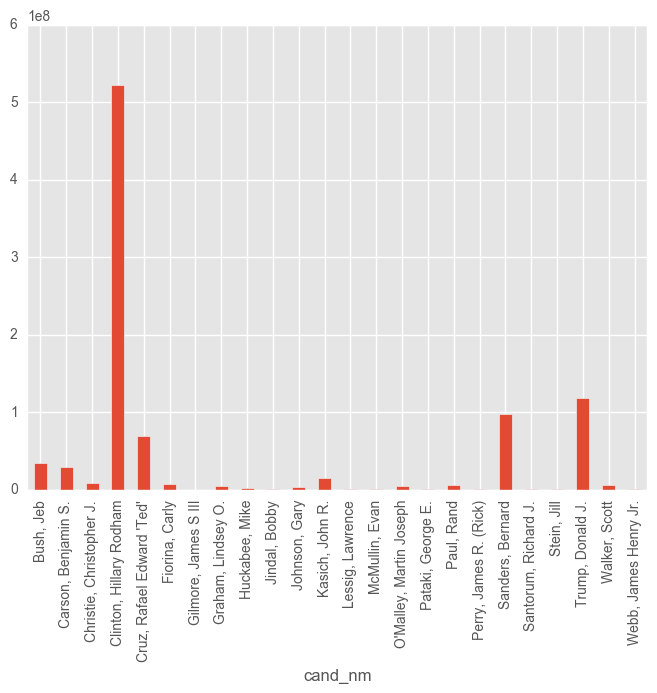

In [237]:
cand_amount.plot(kind='bar')

** 3) Democrats received $624,202,800 and Republicans received #304,813,200

In [239]:

donor_df.groupby('Party')['contb_receipt_amt'].sum()

Party
Democrat      6.242028e+08
Other         5.585495e+06
Republican    3.048132e+08
Name: contb_receipt_amt, dtype: float64

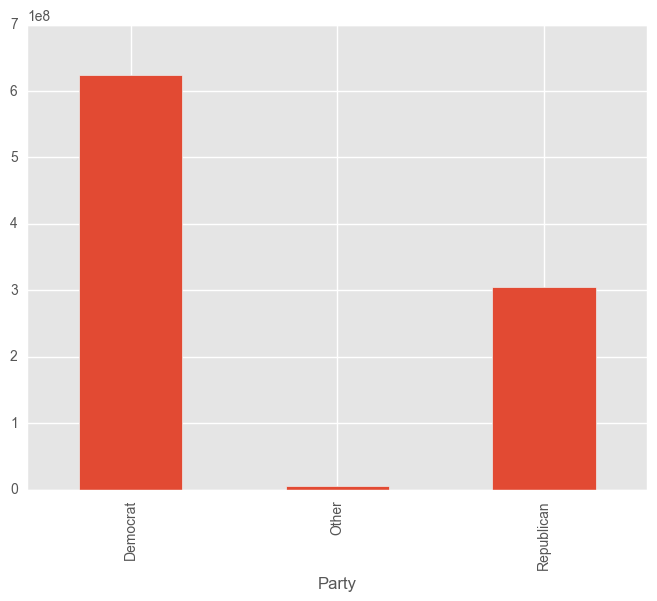

In [259]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [260]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')

In [261]:
occupation_df.head()

Party,Democrat,Other,Republican
contbr_occupation,,,
ADMINISTRATIVE ASSISTANT,150.00,NaN,NaN
ARTIST,100.00,NaN,NaN
ATTORNEY,2100.50,NaN,NaN
CAREER ADVISOR,50.00,NaN,NaN
CERTIFIED REGISTERED NURSE ANESTHETIS,2927.72,NaN,NaN


In [262]:
#there are too many occupations to list unless we take only the occupations that donated between $5,000,000 and $10,000,000
occupation_df.shape

(122736, 3)

In [263]:
#occupation_df = occupation_df[occupation_df.sum(1) > 10000000]
occupation_df = occupation_df[(occupation_df.sum(1) > 5000000) & (occupation_df.sum(1) < 10000000) ]

In [264]:
occupation_df.shape

(9, 3)

** 4) Occupations of the donors separated by party

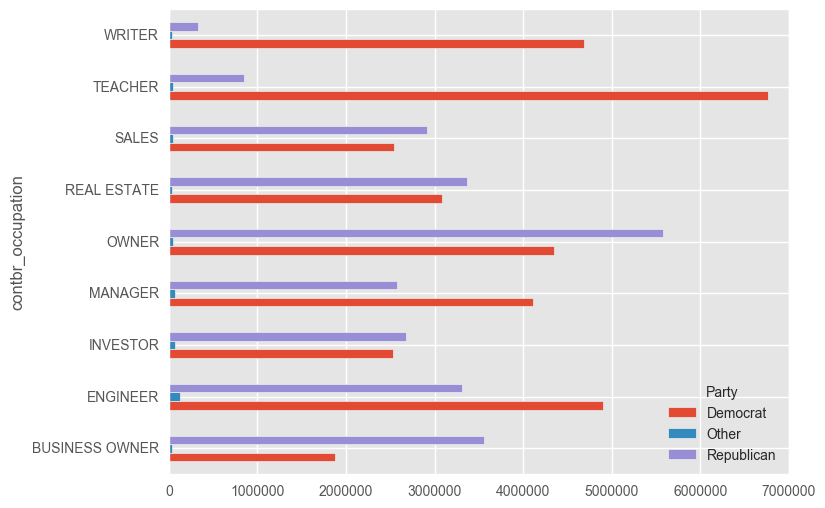

In [265]:

occupation_df.plot(kind='barh')

In [266]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')

In [267]:
#occupation_df = occupation_df[occupation_df.sum(1) > 10000000]
occupation_df = occupation_df[occupation_df.sum(1) > 10000000]
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [268]:
occupation_df.shape

(11, 3)

** 4) Occupations of the donors separated by party

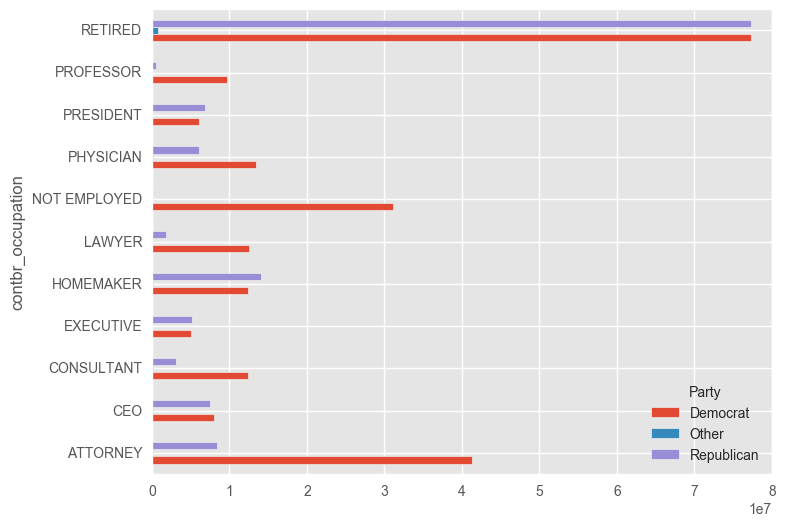

In [269]:
occupation_df.plot(kind='barh')